In [69]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import copy 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from scipy.optimize import minimize 
from scipy.optimize import minimize_scalar
import QUAD as QUAD
import nashpy as nash
from scipy.stats import expon
from scipy.integrate import quad


# this module contains the data
import hst 

## 4

In [70]:
df = pd.read_csv('auction_prices.csv') # pandas dataframe
p = df.values # konvertering til numpy

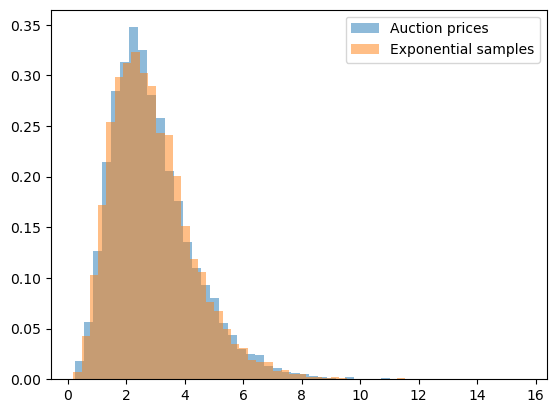

In [71]:
T = 10000

#copy p
p1 = p.copy()

#seed
np.random.seed(1337)

samples = np.random.exponential(2, size=(6,T))

#sort column
samples.sort(axis=0)

win = samples[-2,:] # second highest bid
plt.hist(p1, bins=50, density=True, alpha=0.5)
plt.hist(win, bins=50, density=True,alpha=0.5)
plt.legend(['Auction prices', 'Exponential samples'])

/Users/dekooning/Desktop/MikroB/Eksamens-opgaver/Kode/QUAD.py:27: RuntimeWarning: invalid value encountered in scalar divide
  return v - numer/denom


1.528415222711982
2.7188018220066956
3.537949151937058


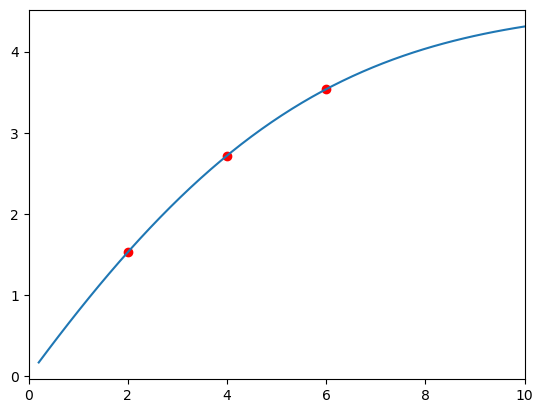

In [72]:
#QUAD
n = 6
F_cdf_exp = lambda v: expon.cdf(v, scale=2)

v_grid = np.linspace(0, 10, 50) # grid for v

#BNE for en FPSB
def b_star(v): 
    return QUAD.b(v,F_cdf_exp, n)

b_array=[]
for v in v_grid:
    bid =b_star(v)
    b_array.append(bid)

points = [2,4,6]

b_points = []
for b in points:
    bid = b_star(b)
    b_points.append(bid)

plt.plot(v_grid, b_array, label='BNE for FPSB')
plt.scatter(points, b_points, color='red', label='Bids at points')
plt.xlim(0, 10)

print(b_star(2))
print(b_star(4))
print(b_star(6))


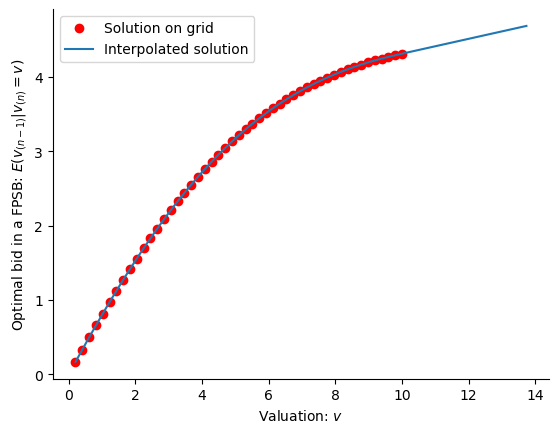

In [78]:
from scipy import interpolate 

v_untruncated = np.random.exponential(2, size=(6,T)).flatten()

b_star_num = interpolate.interp1d(v_grid, b_array, fill_value='extrapolate')

pcts = np.linspace(0, 100, 1000, endpoint=False)
vgrid_fine = np.percentile(v_untruncated, q=pcts)

fig,ax = plt.subplots(); 
ax.plot(v_grid, b_array, 'or', label='Solution on grid'); 
ax.plot(vgrid_fine, b_star_num(vgrid_fine), '-', label='Interpolated solution')
ax.set_xlabel('Valuation: $v$'); ax.set_ylabel('Optimal bid in a FPSB: $E(v_{(n-1)} | v_{(n)} = v)$'); sns.despine(); 
ax.legend(loc='best'); 

[       nan 4.40047264 2.95801082 ...        nan        nan 2.63988324]
2.9095694481381025


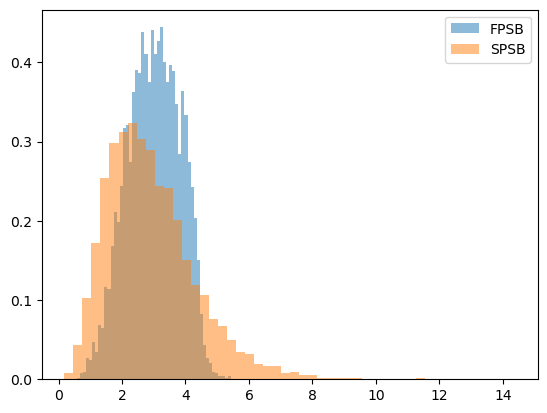

In [77]:
#seed
np.random.seed(1337)

v = np.random.exponential(2, size=(6,T))

#BNE FPSB
FPSB = b_star_num(v)

#Sort
FPSB_sort = np.sort(FPSB, axis=0)

#BNE SPSB
SPSB = v

SPSB_sort = np.sort(SPSB, axis=0)

FPSB_final = FPSB_sort[-1,:] 

SPSB_final = SPSB_sort[-2,:]

plt.hist(FPSB_final, bins=50, density=True, alpha=0.5)
print(FPSB_final)
print(SPSB_final.mean())
plt.hist(SPSB_final, bins=50, density=True, alpha=0.5)
plt.legend(['FPSB', 'SPSB'])